In [1]:
# import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 & 2 Read the data set and making passengerid as index column

In [3]:
data = pd.read_csv(r'C:\Users\USER\Downloads\titanic_dataset.csv',index_col = 'PassengerId')

In [4]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3 finding the basic information of the data

In [5]:
data.shape

(891, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4 finding the missing values

In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

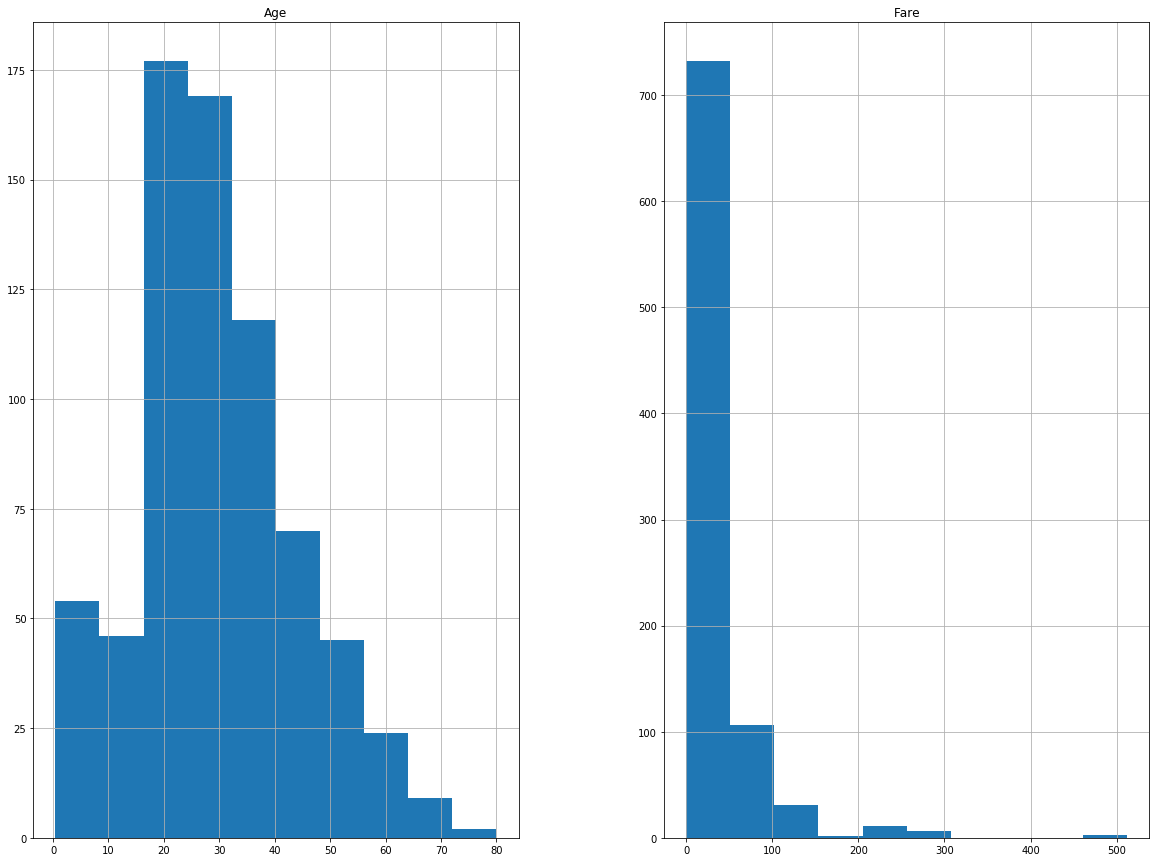

In [10]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize = (20,15))
plt.show()

In [11]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [13]:
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace = True)

In [14]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace = True)

In [15]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5 outliers hadling

In [16]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

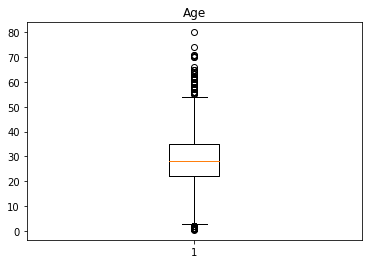

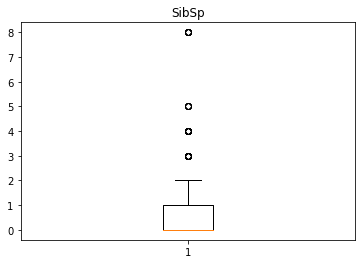

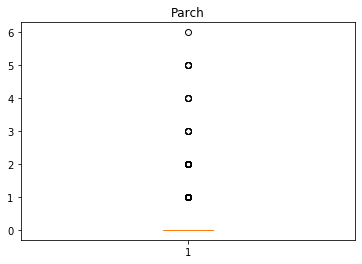

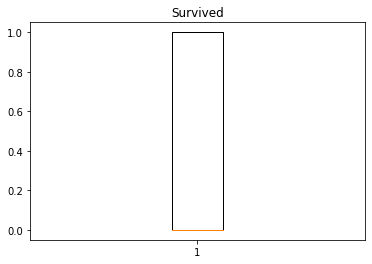

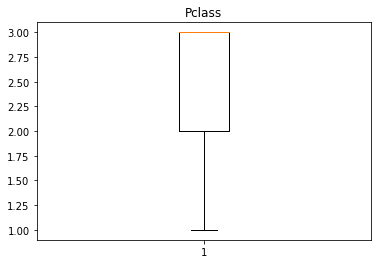

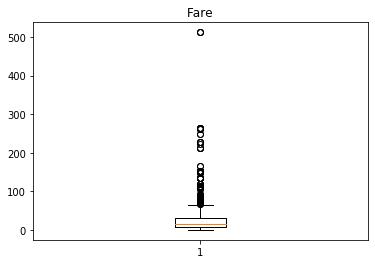

In [17]:
num_cols = ['Age', 'SibSp','Parch','Survived','Pclass','Fare']

for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

# Handling atleast 3 columns in a dataset

# A. SibSp 

In [18]:
Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation='midpoint')

In [19]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [20]:
data['SibSp'].median()

0.0

In [21]:
IQR = Q3-Q1

In [22]:
print(IQR)

1.0


In [23]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [24]:
print(up_lim)
print(low_lim)

2.5
-1.5


In [25]:
outliers = []
for x in data['SibSp']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [26]:
outliers

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [27]:
ind1 = data['SibSp']>up_lim
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [28]:
data.drop([ 8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace = True)

In [29]:
data.shape

(845, 11)

# B. Fare

In [30]:
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

print(Q1)
print(Q2)
print(Q3)

IQR = Q3-Q1
print(IQR)

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print(up_lim)
print(low_lim)

outliers = []
for x in data['Fare']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)
        

7.8958
13.0
30.0
22.1042
63.1563
-25.2605


In [31]:
outliers

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 146.5208,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 80.0,
 83.1583,
 89.1042,
 164.8667,
 83.1583]

In [32]:
ind1 = data['Fare']>up_lim
outliers= data.loc[ind1].index.tolist()
print(outliers)

[2, 32, 35, 53, 62, 63, 73, 98, 103, 119, 121, 125, 140, 152, 196, 216, 219, 225, 231, 246, 257, 258, 259, 263, 269, 270, 276, 291, 292, 298, 300, 306, 307, 308, 311, 312, 319, 320, 326, 333, 335, 337, 338, 367, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 439, 446, 454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 588, 592, 610, 616, 628, 642, 646, 656, 660, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 746, 755, 760, 764, 766, 780, 790, 803, 821, 830, 836, 850, 857, 880]


In [33]:
backup_data= data.copy()

In [34]:
# droping the value
data.drop([2, 32, 35, 53, 62, 63, 73, 98, 103, 119, 121, 125, 140, 152, 196, 216, 219, 225, 231, 246, 257, 258, 259, 263, 269, 270, 276, 291, 292, 298, 300, 306, 307, 308, 311, 312, 319, 320, 326, 333, 335, 337, 338, 367, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 439, 446, 454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 588, 592, 610, 616, 628, 642, 646, 656, 660, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 746, 755, 760, 764, 766, 780, 790, 803, 821, 830, 836, 850, 857, 880],inplace = True)

In [35]:
# shape of the data set
data.shape

(736, 11)

# C. Parch

In [36]:
Q1 = np.percentile(data['Parch'],25,interpolation='midpoint')
Q2 = np.percentile(data['Parch'],50,interpolation='midpoint')
Q3 = np.percentile(data['Parch'],75,interpolation='midpoint')

print(Q1)
print(Q2)
print(Q3)

IQR = Q3-Q1
print(IQR)

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print(up_lim)
print(low_lim)

outliers = []
for x in data['Parch']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

0.0
0.0
0.0
0.0
0.0
0.0


In [37]:
outliers

[2,
 1,
 5,
 5,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 2,
 5,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 6,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 5,
 2]

In [38]:
ind2 = data['Parch']>up_lim
outliers= data.loc[ind2].index.tolist()
print(outliers)

[9, 11, 14, 26, 44, 55, 59, 66, 79, 87, 94, 99, 129, 137, 141, 146, 148, 149, 154, 156, 161, 166, 167, 168, 173, 176, 184, 185, 189, 194, 198, 206, 238, 248, 249, 252, 255, 256, 260, 273, 274, 280, 313, 315, 324, 329, 330, 341, 349, 353, 357, 361, 363, 382, 395, 408, 417, 418, 420, 424, 425, 437, 438, 441, 447, 449, 451, 470, 473, 480, 490, 507, 524, 530, 531, 533, 534, 536, 540, 549, 550, 568, 581, 594, 596, 601, 609, 611, 617, 619, 623, 638, 639, 645, 652, 658, 671, 679, 685, 686, 692, 703, 710, 721, 737, 747, 751, 752, 756, 775, 784, 789, 800, 802, 804, 818, 824, 828, 832, 849, 853, 854, 856, 859, 870, 872, 881, 886, 889]


In [39]:
data.drop([9, 11, 14, 26, 44, 55, 59, 66, 79, 87, 94, 99, 129, 137, 141, 146, 148, 149, 154, 156, 161, 166, 167, 168, 173, 176, 184, 185, 189, 194, 198, 206, 238, 248, 249, 252, 255, 256, 260, 273, 274, 280, 313, 315, 324, 329, 330, 341, 349, 353, 357, 361, 363, 382, 395, 408, 417, 418, 420, 424, 425, 437, 438, 441, 447, 449, 451, 470, 473, 480, 490, 507, 524, 530, 531, 533, 534, 536, 540, 549, 550, 568, 581, 594, 596, 601, 609, 611, 617, 619, 623, 638, 639, 645, 652, 658, 671, 679, 685, 686, 692, 703, 710, 721, 737, 747, 751, 752, 756, 775, 784, 789, 800, 802, 804, 818, 824, 828, 832, 849, 853, 854, 856, 859, 870, 872, 881, 886, 889],inplace = True)

In [40]:
data.shape

(607, 11)

# 6 min max scaling

In [41]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
X= data.drop('Survived',axis = 1)
y= data['Survived']


In [43]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,607.000000,607.000000,607.000000,607.0,607.000000
mean,2.462932,30.935750,0.189456,0.0,15.226413
std,0.758794,11.079706,0.436027,0.0,12.616712
min,1.000000,5.000000,0.000000,0.0,0.000000
25%,2.000000,25.000000,0.000000,0.0,7.775000
50%,3.000000,28.000000,0.000000,0.0,8.850000
75%,3.000000,34.250000,0.000000,0.0,16.750000
max,3.000000,80.000000,2.000000,0.0,61.175000


In [44]:
X1 = X.drop(['Name', 'Sex','Ticket','Cabin', 'Embarked'],axis = 1)

In [45]:
X1

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583
...,...,...,...,...,...
885,3,25.0,0,0,7.0500
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000


In [46]:
X1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583


In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
min_max = MinMaxScaler()

In [49]:
X1 = min_max.fit_transform(X1)

In [50]:
type(X1)

numpy.ndarray